In [39]:
# Running a linear regression on Scikit-Learn to predict the happines index of Australian people using GDP

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

import os
datapath = os.path.join("datasets", "lifesat", "")

# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)


# Cleaning data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv",thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli = oecd_bli.rename(columns={"Life satisfaction": "Life_satisfaction"})
gdp_per_capita.rename(columns={"2015": "GDP"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)

country_stats = pd.DataFrame(full_country_stats[["GDP", 'Life_satisfaction']])
country_stats[["GDP", 'Life_satisfaction']] = country_stats[["GDP", 'Life_satisfaction']].astype(float)


In [40]:
country_stats

,GDP,Life_satisfaction
Country,,
Australia,50961.865,7.3
Austria,43724.031,6.9
Belgium,40106.632,6.9
Brazil,8669.998,7.0
Canada,43331.961,7.3
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Denmark,52114.165,7.5
Estonia,17288.083,5.6


### Removing Australia to use for prediction later 

In [41]:
country_stats = country_stats[(country_stats.index!='Australia')]

### Plotting data

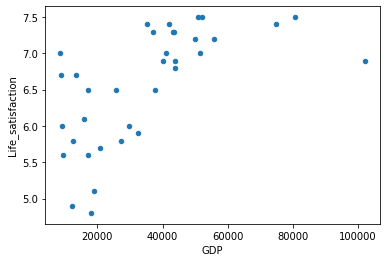

In [42]:
country_stats.plot(kind='scatter', x="GDP", y="Life_satisfaction")
plt.show()

### Using Linear Regresion from sklearn 

In [43]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

X = np.c_[country_stats["GDP"]]
y = np.c_[country_stats["Life_satisfaction"]]

# Train the model
model.fit(X, y)


# Make a prediction for Australia
X_new = [[50961]] # Australia GDP per capita
print(model.predict(X_new))

[[6.92835174]]


The recorded life satisfaction in the original file for Australia is 7.3. The prediction of 6.9 is not too far off.

### Using k-nearest neighbours 

In [44]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [45]:
# Train the model
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [47]:
# Make a prediction for Australia but now using knearest
X_new = [[50961]] # Australia GDP per capita
print(model.predict(X_new))

[[7.23333333]]


The predicion of 7.23 is very close to the recorded 7.3